In [2]:
import sys
sys.setrecursionlimit(10000)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [6]:
# %%capture
# !pip install openpyxl

In [12]:
# T5 for quaterly data
# https://www.singstat.gov.sg/whats-new/latest-news/cpi-highlights.
df = pd.read_csv('cpi.csv')

# 1. Data Cleaning

In [5]:
# Drop unwanted rows
rows_to_drop = [0,1,2,3]
df = df.drop(rows_to_drop)

In [6]:
# Reset the index and set the specified row as the header
header_row = 4
df.columns = df.iloc[header_row - len(rows_to_drop)]
df = df[header_row + 1 - len(rows_to_drop):]

In [7]:
df = df.reset_index(drop=True)
df.index.name = None

In [8]:
# Drop unwanted rows
df = df.drop(df.index[152:])

In [9]:
df = df.set_index('Variables').transpose()

In [10]:
#df.to_csv('cpi.csv')

In [11]:
df = pd.read_csv('cpi.csv')

In [12]:
df.head()

Period  All Items          Food         Food Excl Food Serving Services  \
0  1961 Q1     24.564        21.786                                      na   
1  1961 Q2     24.154        21.127                                      na   
2  1961 Q3     24.395        21.509                                      na   
3  1961 Q4     24.490        21.665                                      na   
4  1962 Q1     24.616        21.844                                      na   

              Bread & Cereals                 Rice                 Flour  \
0                          na                   na                    na   
1                          na                   na                    na   
2                          na                   na                    na   
3                          na                   na                    na   
4                          na                   na                    na   

                  Bread                 Noodles & Pasta  \
0                    na                              na   
1                    na                              na   
2                    na                              na   
3                    na                              na   
4                    na                              na   

                  Biscuits & Cookies  ...                 Spirits & Wine  \
0                                 na  ...                             na   
1                                 na  ...                             na   
2                                 na  ...                             na   
3                                 na  ...                             na   
4                                 na  ...                             na   

                  Beer                 Cigarettes  \
0                   na                         na   
1                   na                         na   
2                   na                         na   
3                   na                         na   
4                   na                         na   

              Personal Effects                 Jewellery & Watches  \
0                           na                                  na   
1                           na                                  na   
2                           na                                  na   
3                           na                                  na   
4                           na                                  na   

                  Other Personal Effects             Social Services  \
0                                     na                          na   
1                                     na                          na   
2                                     na                          na   
3                                     na                          na   
4                                     na                          na   

              Other Miscellaneous Services  \
0                                       na   
1                                       na   
2                                       na   
3                                       na   
4                                       na   

  All Items Less Imputed Rentals On Owner-occupied Accommodation3  \
0                                                 na                
1                                                 na                
2                                                 na                
3                                                 na                
4                                                 na                

  All Items Less Accommodation3  
0                            na  
1                            na  
2                            na  
3                            na  
4                            na  

[5 rows x 153 columns]

### Since we are only analysing a decade worth of data, we sliced the dataset from 2014 Q1 to 2024 Q1

In [16]:
df.set_index("Period",inplace=True)
df = df.loc["2004 Q1":"2024 Q1"]
df.reset_index(inplace=True)

In [17]:
df

Period  All Items          Food         Food Excl Food Serving Services  \
0   2004 Q1     76.135        69.939                                  66.382   
1   2004 Q2     76.486        69.850                                  66.077   
2   2004 Q3     76.744        70.411                                  67.241   
3   2004 Q4     76.708        70.820                                  67.615   
4   2005 Q1     76.336        71.052                                  68.095   
..      ...        ...           ...                                     ...   
76  2023 Q1    112.000       113.935                                 114.913   
77  2023 Q2    113.093       114.933                                 115.628   
78  2023 Q3    114.164       115.474                                 116.007   
79  2023 Q4    115.121       116.148                                 116.452   
80  2024 Q1    115.335       117.769                                 117.298   

               Bread & Cereals                 Rice                 Flour  \
0                       67.325                   na                    na   
1                       67.808                   na                    na   
2                       68.016                   na                    na   
3                       68.257                   na                    na   
4                       68.537                   na                    na   
..                         ...                  ...                   ...   
76                     111.782               97.952               107.004   
77                     113.577              101.507               111.183   
78                     114.407              102.124               108.529   
79                     115.926              103.928               107.265   
80                     116.579              101.878               106.391   

                   Bread                 Noodles & Pasta  \
0                     na                              na   
1                     na                              na   
2                     na                              na   
3                     na                              na   
4                     na                              na   
..                   ...                             ...   
76               113.352                         116.398   
77               115.247                          117.67   
78               116.757                         116.966   
79               118.922                         118.253   
80               119.595                         118.756   

                   Biscuits & Cookies  ...                 Spirits & Wine  \
0                                  na  ...                             na   
1                                  na  ...                             na   
2                                  na  ...                             na   
3                                  na  ...                             na   
4                                  na  ...                             na   
..                                ...  ...                            ...   
76                            118.749  ...                         97.681   
77                            119.711  ...                        100.329   
78                            120.504  ...                          102.3   
79                            121.134  ...                        103.291   
80                            122.792  ...                        103.081   

                   Beer                 Cigarettes  \
0                    na                         na   
1                    na                         na   
2                    na                         na   
3                    na                         na   
4                    na                         na   
..                  ...                        ...   
76               99.955                    109.576   
77              103.678                  

In [18]:
any(df.isna().sum())

False

In [19]:
df.columns = df.columns.str.strip()

In [26]:
df.columns

Index(['Period', 'All Items', 'Food', 'Food Excl Food Serving Services',
       'Bread & Cereals', 'Rice', 'Flour', 'Bread', 'Noodles & Pasta',
       'Biscuits & Cookies',
       ...
       'Spirits & Wine', 'Beer', 'Cigarettes', 'Personal Effects',
       'Jewellery & Watches', 'Other Personal Effects', 'Social Services',
       'Other Miscellaneous Services',
       'All Items Less Imputed Rentals On Owner-occupied Accommodation3',
       'All Items Less Accommodation3'],
      dtype='object', length=153)

In [31]:
df.to_csv('cpi_quarterly_two_decade_24.csv',index=False)

## 2. Analysing CPI with price indices

**What is CPI?**

The average price changes across different products and outlets are represented by the CPI. A measure of inflation.


**How are CPI weights assigned?**

Weights are necessary in the CPI compilation process to represent the relative importance of each commodity or service in the basket, or its contribution as a percentage of total household spending. Families typically spend less on certain products and services and more on others. Price changes for various commodities and services will therefore affect households differently. The Household Expenditure Survey (HES) expenditure values are the source of the weights used in the CPI.

Food, transportation, and housing & utilities remained the top three expenditure categories in the CPI for 2019. They accounted for roughly 63.0% of the CPI's total weight overall, which is little less than the 63.8% of the CPI based on 2014 data. [1]

- 24.8% Housing and Utilities
- 21.1% Food
- 17.1% Transport

[1] Department Of Statistics Singapore, “Rebasing the Consumer Price Index (2019 as base year),” Department Of Statistics Singapore, ISSN 2591-7544, Feb. 2020. Accessed: Jun. 08, 2024. [Online]. Available: https://www.singstat.gov.sg/modules/infographics/-/media/Files/publications/economy/ip-e48.pdf

### CPI trend from 2014 to 2024 for each quarters (Q1 to Q4)

In [40]:
df = pd.read_csv('cpi_quarterly_decade_24.csv')

In [42]:
df.columns

Index(['Period', 'All Items', 'Food', 'Food Excl Food Serving Services',
       'Bread & Cereals', 'Rice', 'Flour', 'Bread', 'Noodles & Pasta',
       'Biscuits & Cookies',
       ...
       'Spirits & Wine', 'Beer', 'Cigarettes', 'Personal Effects',
       'Jewellery & Watches', 'Other Personal Effects', 'Social Services',
       'Other Miscellaneous Services',
       'All Items Less Imputed Rentals On Owner-occupied Accommodation3',
       'All Items Less Accommodation3'],
      dtype='object', length=153)

In [44]:
df.isna().sum()

Period                                                             0
All Items                                                          0
Food                                                               0
Food Excl Food Serving Services                                    0
Bread & Cereals                                                    0
                                                                  ..
Other Personal Effects                                             0
Social Services                                                    0
Other Miscellaneous Services                                       0
All Items Less Imputed Rentals On Owner-occupied Accommodation3    0
All Items Less Accommodation3                                      0
Length: 153, dtype: int64

## 2. Analysing CPI Trends - EDA

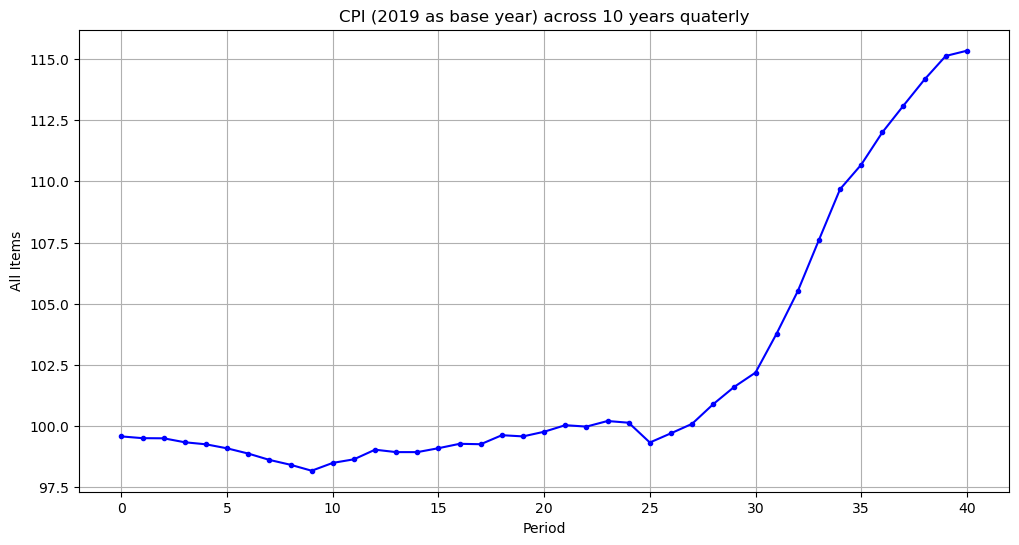

In [47]:
# Plotting the time series for 'All Items'
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['All Items'], marker='.', linestyle='-', color='b')

# Adding titles and labels
plt.title('CPI (2019 as base year) across 10 years quaterly')
plt.xlabel('Period')
plt.ylabel('All Items')

# Displaying the plot
plt.grid(True)
plt.show()

- Generally inflation is increasing during a ten-year period, going from less than 100 points to more than 115 points (highlight specific figures from the dataset).
- The rise began to pick up steam on the 25th quarter @ 2020 Q2 (check), coinciding with the onset of the COVID-19 pandemic.
- Inflation trend seems to start to plateau from 2023 Q4.

In [49]:
# # Create an interactive time series plot for 'All Items' using Plotly Express
# fig = px.line(df, x='Period', y='All Items', title='CPI (2019 as base year) 2004 - 2024 Quarterly')
# fig.update_xaxes(title_text='Period')
# fig.update_yaxes(title_text='All Items')

# # Show plot
# fig.show()

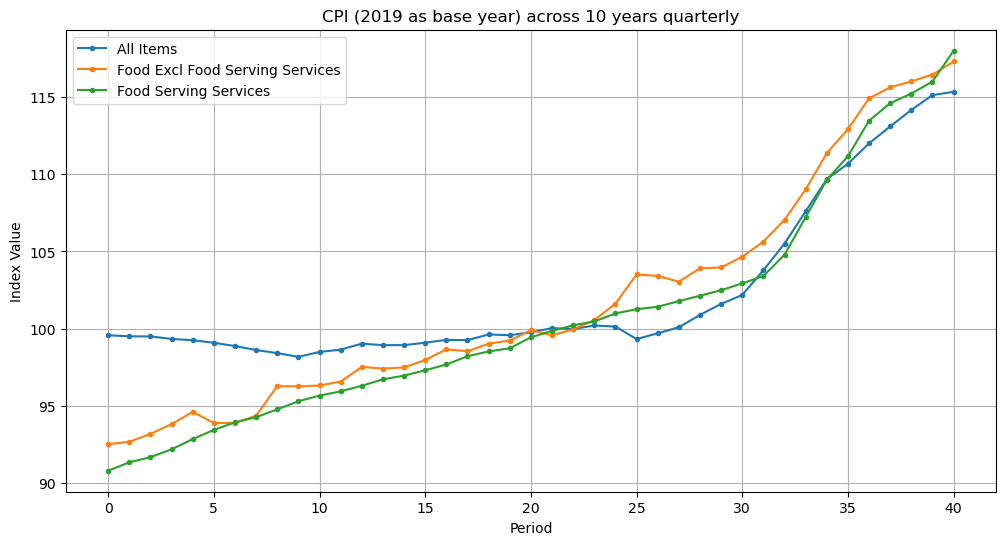

In [50]:
# Plotting the time series for 'All Items' and 'Food'
plt.figure(figsize=(12, 6))

for column in ['All Items', 'Food Excl Food Serving Services', 'Food Serving Services']:
    plt.plot(df.index, df[column], marker='.', linestyle='-', label=column)

# Adding titles and labels
plt.title('CPI (2019 as base year) across 10 years quarterly')
plt.xlabel('Period')
plt.ylabel('Index Value')

# Adding legend
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()

- Explain trend with Food and Food Serving Services with overall CPI

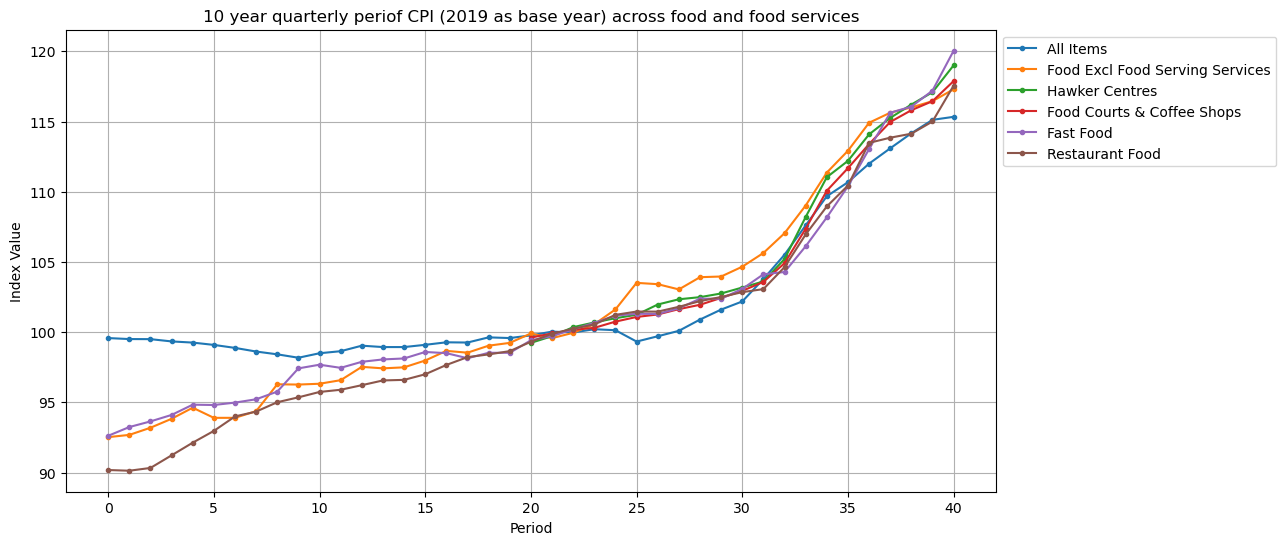

In [54]:
# Find the index of the first non-zero value for each column
first_nonzero_index = df.apply(lambda x: np.argmax(x != 0))

# Plotting the time series for food service categories starting from the first non-zero index
plt.figure(figsize=(12, 6))

for column in ['All Items','Food Excl Food Serving Services', 'Hawker Centres', 'Food Courts & Coffee Shops', 'Fast Food', 'Restaurant Food']:
    start_index = first_nonzero_index[column]
    plt.plot(df.index[start_index:], df[column].iloc[start_index:], marker='.', linestyle='-', label=column)

# Adding titles and labels
plt.title('10 year quarterly periof CPI (2019 as base year) across food and food services')
plt.xlabel('Period')
plt.ylabel('Index Value')

# Adding legend with better layout
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Displaying the plot
plt.grid(True)
plt.show()

- Explain trends 
- Generally sub categroies of food services increased along with the overall trends... (explore the cpiapr24 csv sheet T5 to see how it is categorised)

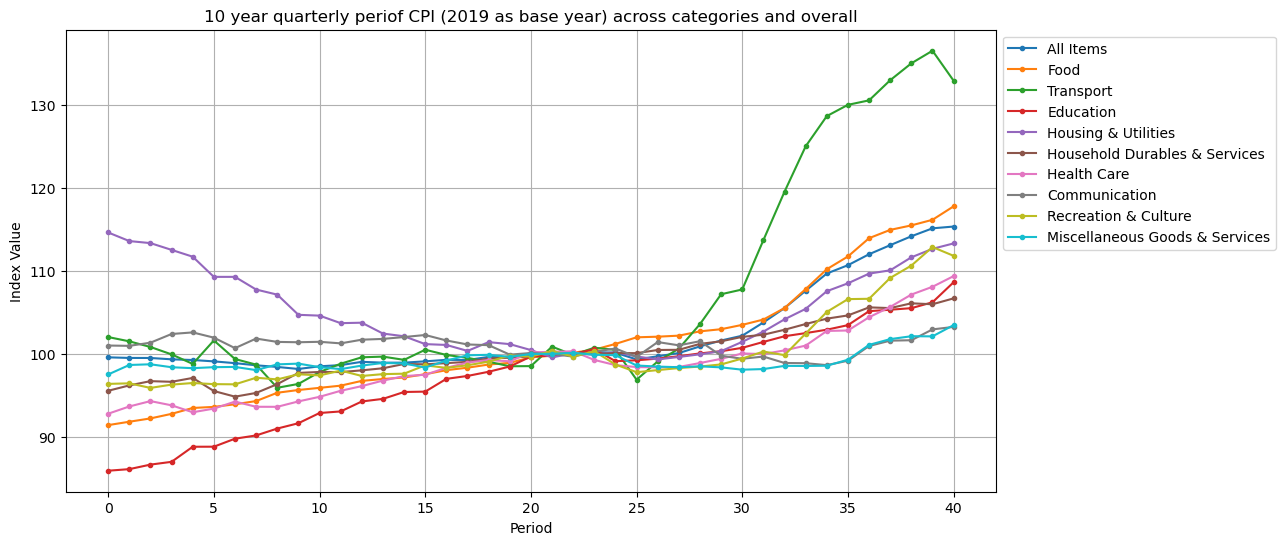

In [57]:
# Find the index of the first non-zero value for each column
first_nonzero_index = df.apply(lambda x: np.argmax(x != 0))

# Plotting the time series for food service categories starting from the first non-zero index
plt.figure(figsize=(12, 6))

for column in ['All Items','Food','Transport', 
               'Education', 'Housing & Utilities',
               'Household Durables & Services',
               'Health Care', 'Communication',
               'Recreation & Culture',
               'Miscellaneous Goods & Services']:
    
    start_index = first_nonzero_index[column]
    plt.plot(df.index[start_index:], df[column].iloc[start_index:], marker='.', linestyle='-', label=column)

# Adding titles and labels
plt.title('10 year quarterly periof CPI (2019 as base year) across categories and overall')
plt.xlabel('Period')
plt.ylabel('Index Value')

# Adding legend with better layout
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Displaying the plot
plt.grid(True)
plt.show()

- Across all categories, transport increased the most points from __ to __ across 10 year period
- Pick up steam / increase at a faster pace from 2020 Q2 (Period 25) ....
- What does this entail? What does this mean? 

- Explain the other trends for the other top weightage categories - housing and utilities & Food

In [59]:
df.head()

Period  All Items    Food  Food Excl Food Serving Services  \
0  2014 Q1     99.580  91.417                           92.525   
1  2014 Q2     99.509  91.823                           92.685   
2  2014 Q3     99.503  92.223                           93.193   
3  2014 Q4     99.341  92.773                           93.831   
4  2015 Q1     99.258  93.481                           94.621   

   Bread & Cereals    Rice    Flour   Bread  Noodles & Pasta  \
0           93.498  93.882  101.517  93.209          101.033   
1           94.030  95.773  102.692  93.134          100.584   
2           94.177  95.561  100.796  93.133           99.363   
3           94.779  96.845  101.530  93.284          100.339   
4           95.162  94.662   99.857  94.592           99.661   

   Biscuits & Cookies  ...  Spirits & Wine     Beer  Cigarettes  \
0              90.780  ...         104.676   99.410      85.664   
1              92.454  ...         107.345  108.250      90.940   
2              92.923  ...         104.341  107.431      90.940   
3              94.753  ...         104.930  107.093      90.940   
4              94.486  ...         103.347  108.158      90.940   

   Personal Effects  Jewellery & Watches  Other Personal Effects  \
0            98.871              100.560                  98.489   
1            98.651              100.560                  98.220   
2            99.127              100.455                  98.827   
3            97.991              101.375                  97.227   
4            97.654              101.991                  96.676   

   Social Services  Other Miscellaneous Services  \
0           94.043                        97.549   
1           94.043                        97.567   
2           95.382                        97.861   
3           96.051                        97.804   
4           96.708                        97.882   

   All Items Less Imputed Rentals On Owner-occupied Accommodation3  \
0                                             95.811                 
1                                             95.813                 
2                                             95.946                 
3                                             95.931                 
4                                             95.991                 

   All Items Less Accommodation3  
0                         95.382  
1                         95.592  
2                         95.653  
3                         95.636  
4                         95.572  

[5 rows x 153 columns]

In [60]:
categories = ['All Items','Food','Transport',
              'Education', 'Housing & Utilities',
              'Household Durables & Services',
              'Health Care', 'Communication',
              'Recreation & Culture',
              'Miscellaneous Goods & Services']

df_cat = df[categories]

#df_cat.head()

In [62]:
corr_matrix = df_cat.corr()

In [63]:
corr_matrix.head(5)

All Items      Food  Transport  Education  \
All Items             1.000000  0.933429   0.987574   0.740214   
Food                  0.933429  1.000000   0.906835   0.922051   
Transport             0.987574  0.906835   1.000000   0.707584   
Education             0.740214  0.922051   0.707584   1.000000   
Housing & Utilities   0.440142  0.103617   0.447356  -0.265878   

                     Housing & Utilities  Household Durables & Services  \
All Items                       0.440142                       0.891791   
Food                            0.103617                       0.979027   
Transport                       0.447356                       0.873516   
Education                      -0.265878                       0.940372   
Housing & Utilities             1.000000                       0.018237   

                     Health Care  Communication  Recreation & Culture  \
All Items               0.875640      -0.019652              0.961133   
Food                    0.958830      -0.142070              0.938585   
Transport               0.831597      -0.092790              0.920425   
Education               0.941002      -0.291783              0.799843   
Housing & Utilities     0.014410       0.381202              0.314555   

                     Miscellaneous Goods & Services  
All Items                                  0.718074  
Food                                       0.714561  
Transport                                  0.621545  
Education                                  0.647862  
Housing & Utilities                        0.220628

In [64]:
# Extracting correlations with "All Items"
corr_with_all_items = corr_matrix[['All Items']]

In [65]:
corr_with_all_items

All Items
All Items                        1.000000
Food                             0.933429
Transport                        0.987574
Education                        0.740214
Housing & Utilities              0.440142
Household Durables & Services    0.891791
Health Care                      0.875640
Communication                   -0.019652
Recreation & Culture             0.961133
Miscellaneous Goods & Services   0.718074

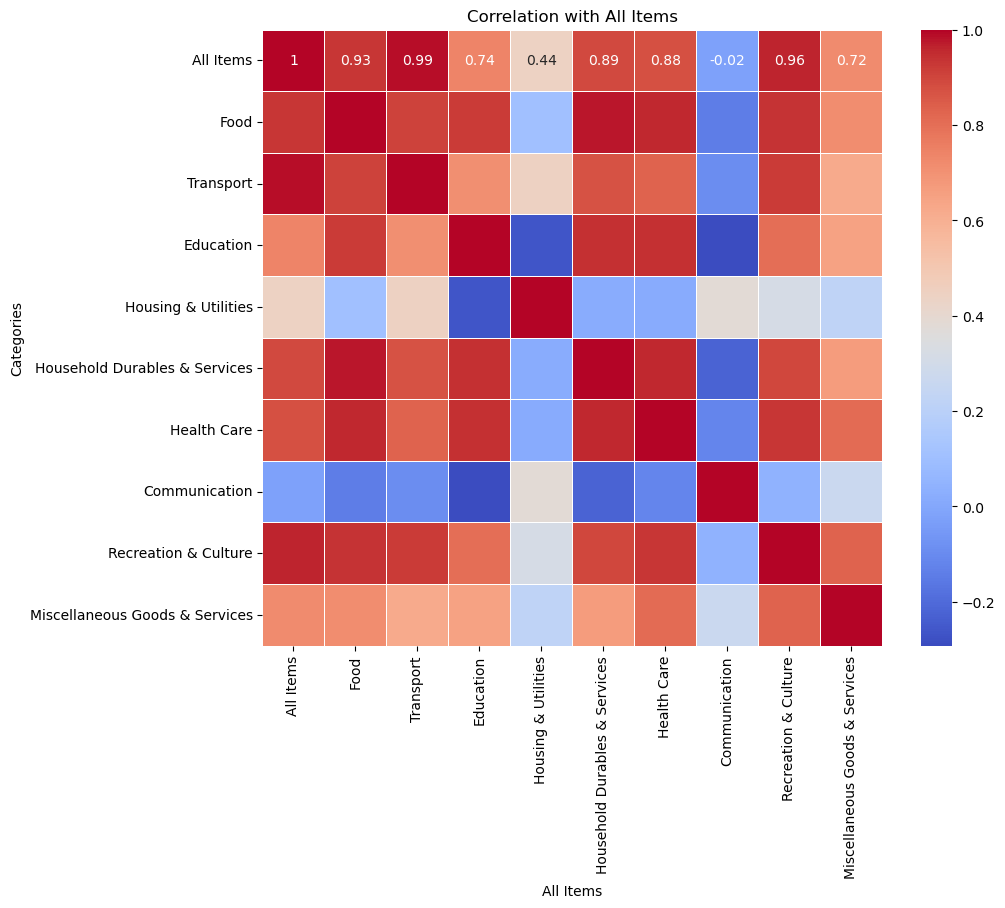

In [68]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5)

# Adding title and labels
plt.title('Correlation with All Items')
plt.xlabel('All Items')
plt.ylabel('Categories')

# Displaying the heatmap
plt.show()

## Analysing Transport Category

In [75]:
transport_cat_col = ['Private Transport', 'Cars', 'Motorcycles', 'Petrol', 'Other Private Transport',
               'Public Transport', 'Bus & Train Fares', 'Point-to-point Transport Services2',
               'Other Public Transport', 'Other Transport Services', 'Other Transport']

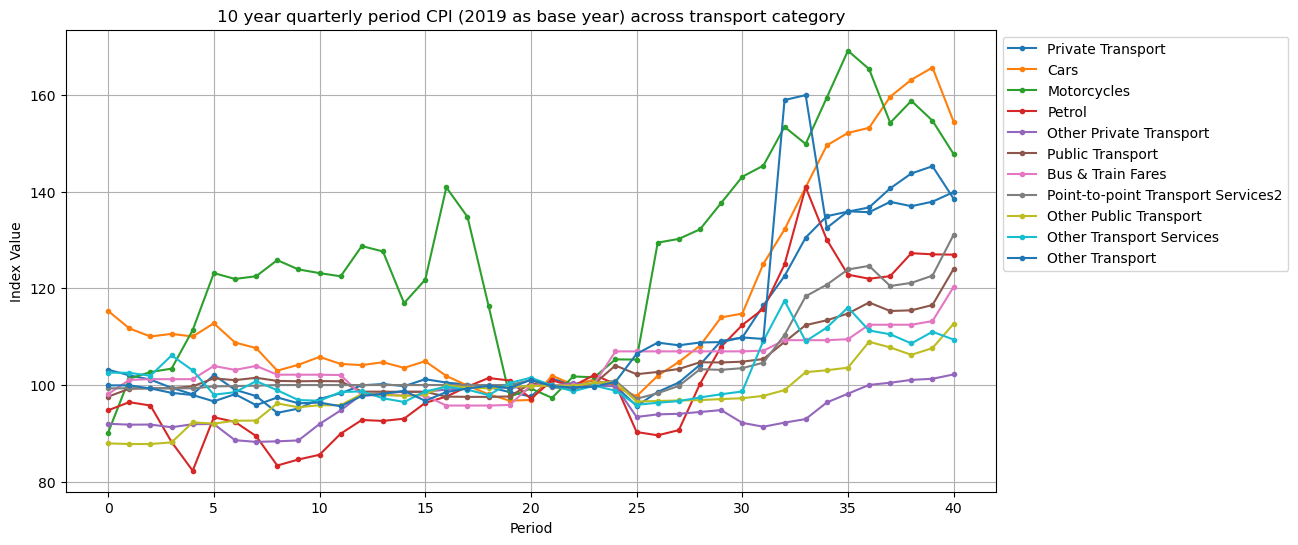

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Find the index of the first non-zero value for each column
first_nonzero_index = df.apply(lambda x: np.argmax(x != 0))

# Plotting the time series for food service categories starting from the first non-zero index
plt.figure(figsize=(12, 6))

for column in transport_cat_col:
    
    start_index = first_nonzero_index[column]
    plt.plot(df.index[start_index:], df[column].iloc[start_index:], marker='.', linestyle='-', label=column)

plt.title('10 year quarterly period CPI (2019 as base year) across transport category')
plt.xlabel('Period')
plt.ylabel('Index Value')

# Adding legend with better layout
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Displaying the plot
plt.grid(True)
plt.show()

In [77]:
### Percentage change

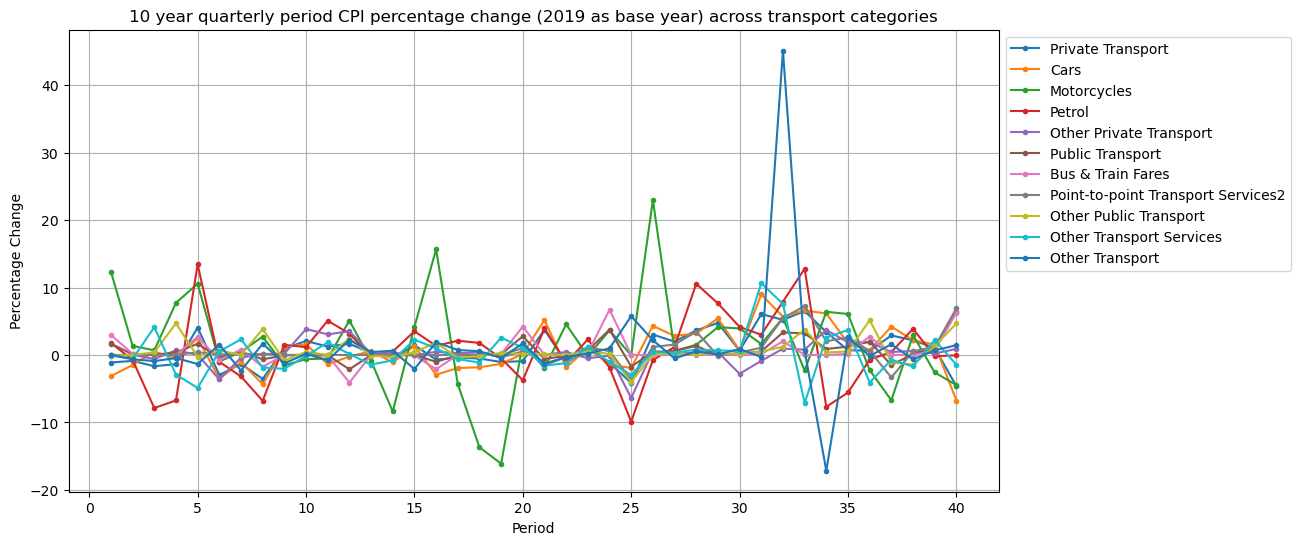

In [78]:
# Calculate the percentage change for each column
df_pct_change = df[transport_cat_col].pct_change() * 100  # Convert to percentage

# Find the index of the first non-zero value for each column
first_nonzero_index = df_pct_change.apply(lambda x: np.argmax(x != 0))

# Plotting the percentage change time series for transport categories starting from the first non-zero index
plt.figure(figsize=(12, 6))

for column in transport_cat_col:
    
    if column in df_pct_change.columns:
        start_index = first_nonzero_index[column]
        plt.plot(df_pct_change.index[start_index:], df_pct_change[column].iloc[start_index:], marker='.', linestyle='-', label=column)

plt.title('10 year quarterly period CPI percentage change (2019 as base year) across transport categories')
plt.xlabel('Period')
plt.ylabel('Percentage Change')

# Adding legend with better layout
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Displaying the plot
plt.grid(True)
plt.show()

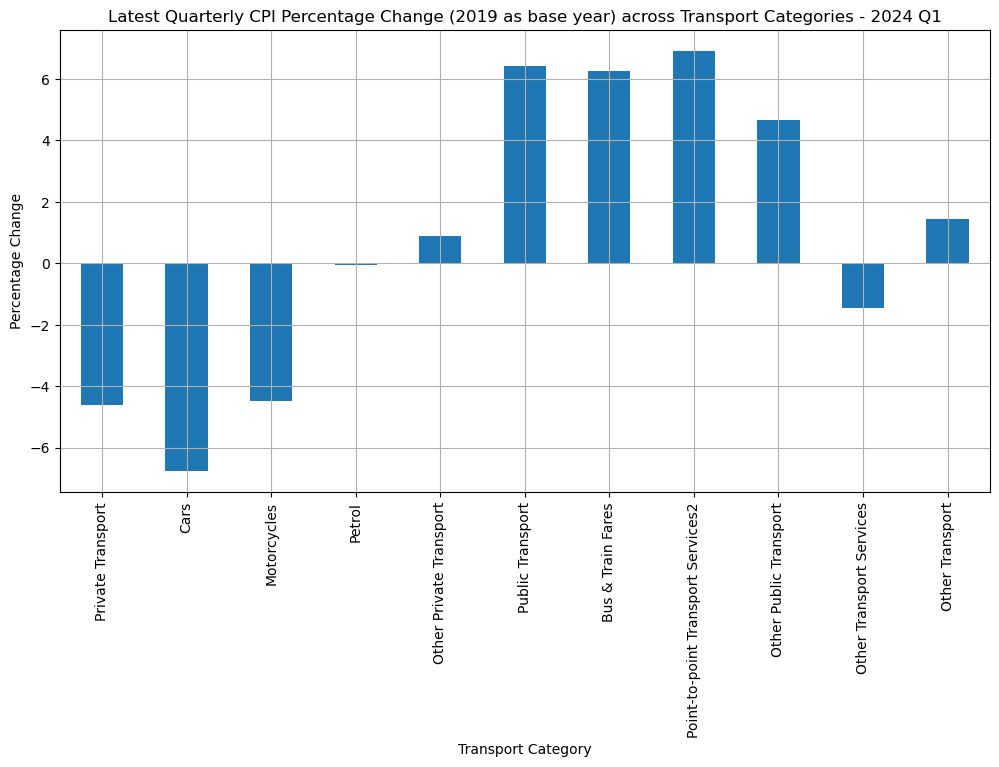

In [80]:
# Extract the latest percentage change for each transport category
latest_pct_change = df_pct_change.iloc[-1]

# Create a bar plot
plt.figure(figsize=(12, 6))
latest_pct_change.plot(kind='bar')
plt.title('Latest Quarterly CPI Percentage Change (2019 as base year) across Transport Categories - 2024 Q1')
plt.xlabel('Transport Category')
plt.ylabel('Percentage Change')
plt.grid(True)
plt.show()

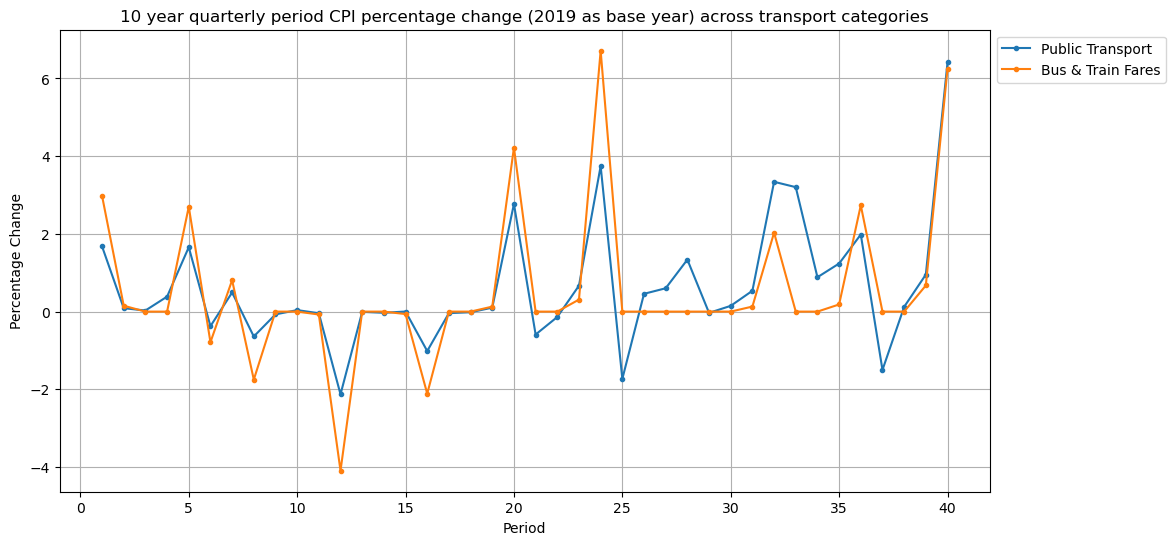

In [81]:
# Calculate the percentage change for each column
df_pct_change = df[transport_cat_col].pct_change() * 100  # Convert to percentage

# Find the index of the first non-zero value for each column
first_nonzero_index = df_pct_change.apply(lambda x: np.argmax(x != 0))

# Plotting the percentage change time series for transport categories starting from the first non-zero index
plt.figure(figsize=(12, 6))

for column in ['Public Transport', 'Bus & Train Fares', 'Other public transport']:
    
    if column in df_pct_change.columns:
        start_index = first_nonzero_index[column]
        plt.plot(df_pct_change.index[start_index:], df_pct_change[column].iloc[start_index:], marker='.', linestyle='-', label=column)

plt.title('10 year quarterly period CPI percentage change (2019 as base year) across transport categories')
plt.xlabel('Period')
plt.ylabel('Percentage Change')

# Adding legend with better layout
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Displaying the plot
plt.grid(True)
plt.show()

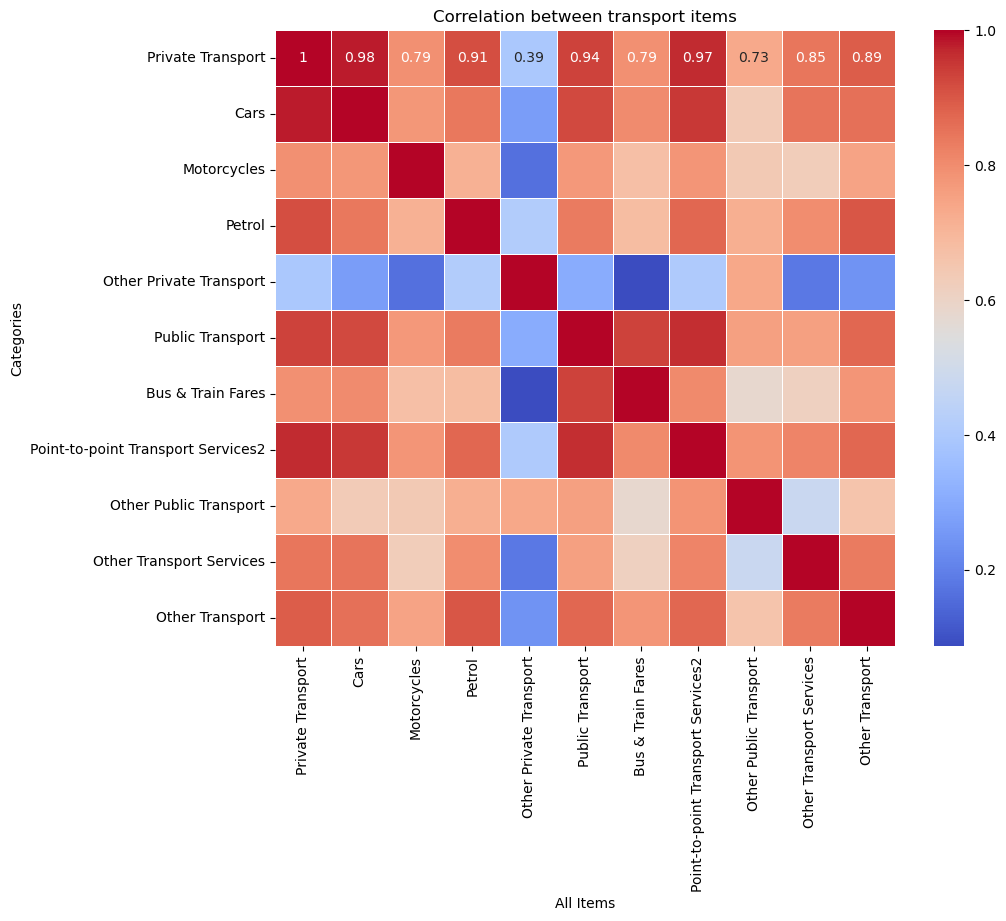

In [82]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[transport_cat_col].corr(), annot=True, cmap='coolwarm', cbar=True, linewidths=0.5)

# Adding title and labels
plt.title('Correlation between transport items')
plt.xlabel('All Items')
plt.ylabel('Categories')

# Displaying the heatmap
plt.show()

## Analysing Oil Prices

In [85]:
df_oil = pd.read_csv('BrentOilPrices.csv')
df_oil.head()

Date  Price
0  May 20, 1987  18.63
1  May 21, 1987  18.45
2  May 22, 1987  18.55
3  May 25, 1987  18.60
4  May 26, 1987  18.63

In [86]:
# Check the total rows in the dataset
len(df_oil)

9398

In [90]:
# Convert the 'Date' column to datetime format, inferring format
df_oil['Date'] = pd.to_datetime(df_oil['Date'], format='%b %d, %Y', errors='coerce')

In [93]:
# Check if any Date conversion failed
invalid_dates = df_oil[pd.to_datetime(df_oil['Date'], errors='coerce').isnull()]['Date']
print("Invalid dates:")
print(invalid_dates)

Invalid dates:
Series([], Name: Date, dtype: datetime64[ns])


In [94]:
# Set Date as index
df_oil.set_index('Date', inplace=True)

# Resample the data to get quarterly averages
df_oil_quarterly = df_oil.resample('Q').mean()

# Reset the index to add the 'Quarter' column
df_oil_quarterly = df_oil_quarterly.reset_index()

# Create the 'Year_Quarter' column
df_oil_quarterly['Year_Quarter'] = df_oil_quarterly['Date'].dt.to_period('Q').astype(str).apply(lambda x: x[:4] + ' ' + x[4:])

In [95]:
df_oil_quarterly.head()

Date      Price Year_Quarter
0 1987-06-30  18.783103      1987 Q2
1 1987-09-30  19.063030      1987 Q3
2 1987-12-31  17.865538      1987 Q4
3 1988-03-31  15.655323      1988 Q1
4 1988-06-30  16.129841      1988 Q2

In [97]:
# Filter from 2014 - 2024
df_oil_filtered = df_oil_quarterly[(df_oil_quarterly['Date'].dt.year >= 2014) & (df_oil_quarterly['Date'].dt.year <= 2024)]

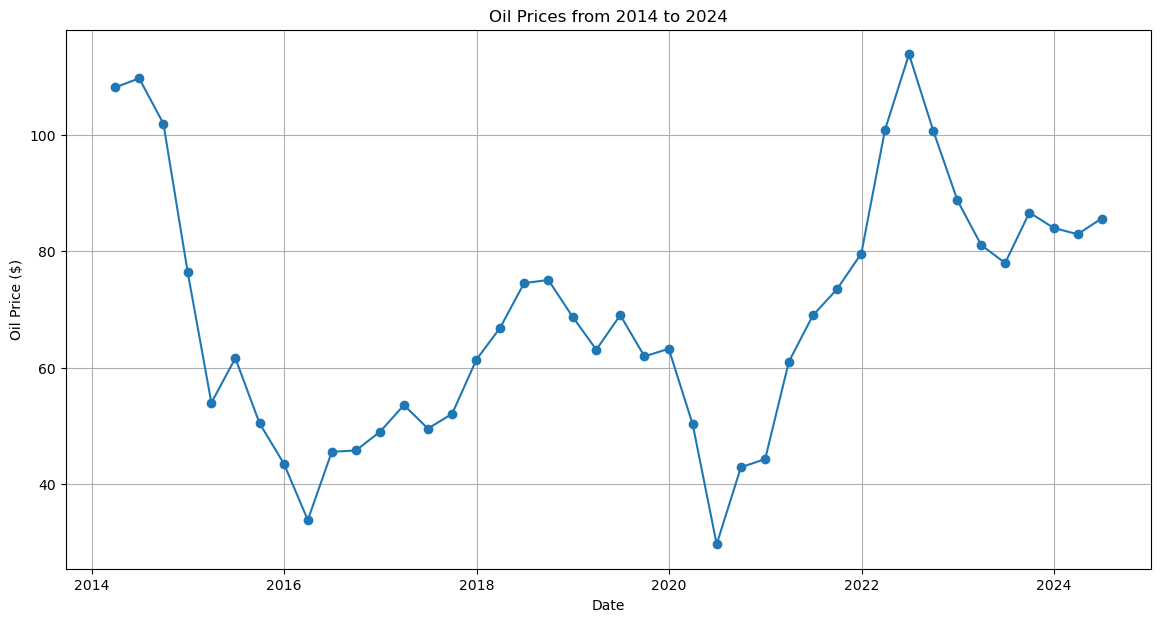

In [100]:
# Plot the price line chart to see the trend
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df_oil_filtered['Date'], df_oil_filtered['Price'], marker='o', linestyle='-')
plt.title('Oil Prices from 2014 to 2024')
plt.xlabel('Date')
plt.ylabel('Oil Price ($)')
plt.grid(True)
plt.show()

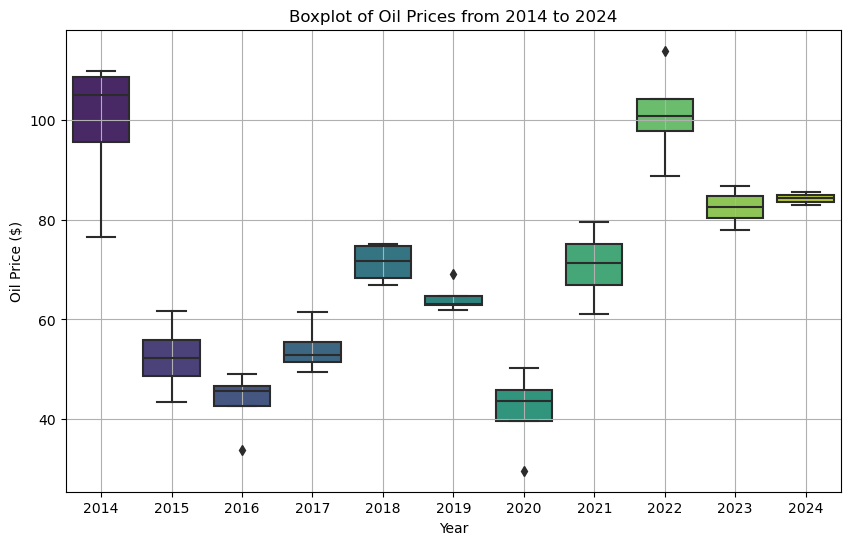

In [101]:
# Plot Box Plot
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_oil_filtered['Date'].dt.year, y=df_oil_filtered['Price'], palette='viridis')
plt.title('Boxplot of Oil Prices from 2014 to 2024')
plt.xlabel('Year')
plt.ylabel('Oil Price ($)')
plt.grid(True)
plt.show()

In [103]:
# Since our CPI dataset is with base year 2019, we will add an index column to brent oil price and create an index based on year 2019 (so 2019 = 100)
# This will make it easier to do a comparison between the two

# Get the price for the year 2019
price_2019 = df_oil_filtered.loc[df_oil_filtered['Date'].dt.year == 2019, 'Price'].iloc[0]

# Calculate the percentage increase based on the year 2019
df_oil_filtered['Percentage_Increase'] = (df_oil_filtered['Price'] / price_2019 - 1) * 100

# Calculate the index starting at 100 for the year 2019
df_oil_filtered['Oil_Index_2019'] = 100 + df_oil_filtered['Percentage_Increase']

/var/folders/dv/wgbt9rw54hzbf259rbdr3rqm0000gn/T/ipykernel_51752/3592539482.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oil_filtered['Percentage_Increase'] = (df_oil_filtered['Price'] / price_2019 - 1) * 100
/var/folders/dv/wgbt9rw54hzbf259rbdr3rqm0000gn/T/ipykernel_51752/3592539482.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oil_filtered['Oil_Index_2019'] = 100 + df_oil_filtered['Percentage_Increase']


In [107]:
df_oil_filtered.head()

Date       Price Year_Quarter  Percentage_Increase  Oil_Index_2019
107 2014-03-31  108.141935      2014 Q1            71.389160      171.389160
108 2014-06-30  109.694063      2014 Q2            73.849055      173.849055
109 2014-09-30  101.899844      2014 Q3            61.496358      161.496358
110 2014-12-31   76.429219      2014 Q4            21.129140      121.129140
111 2015-03-31   53.977097      2015 Q1           -14.454192       85.545808

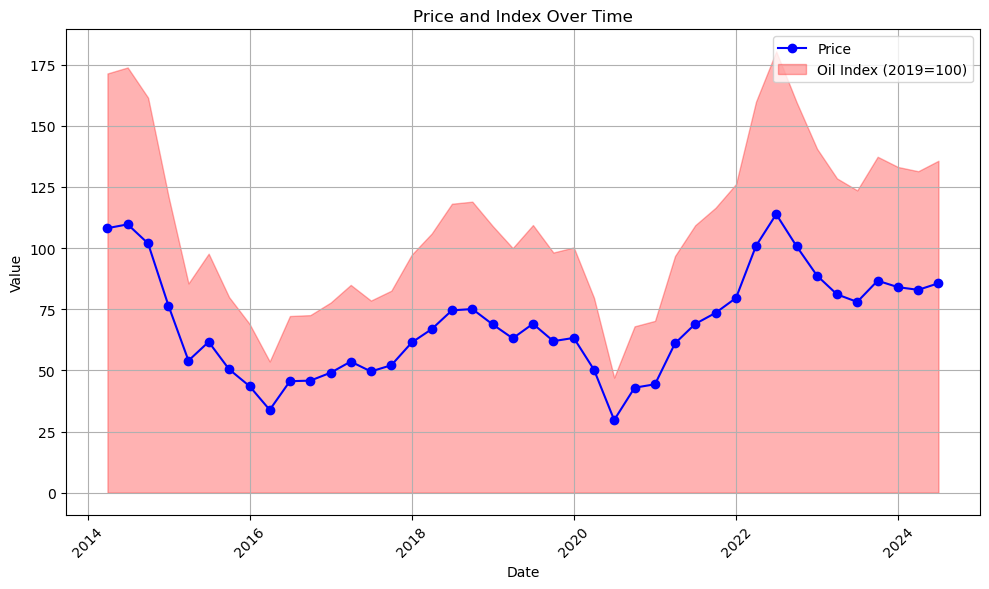

In [109]:
# Plotting a price and index area chart
plt.figure(figsize=(10, 6))

# Price plot (line plot)
plt.plot(df_oil_filtered['Date'], df_oil_filtered['Price'], marker='o', linestyle='-', color='b', label='Price')

# Index plot (stacked area plot)
plt.fill_between(df_oil_filtered['Date'], df_oil_filtered['Oil_Index_2019'], color='r', alpha=0.3, label='Oil Index (2019=100)')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Price and Index Over Time')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

In [110]:
# Merge the two dataframes (df and df_oil_filtered) which has "Period" and "Year_Quarter" as common (CPI and Brent Price)
df_merged = pd.merge(df, df_oil_filtered, left_on='Period', right_on='Year_Quarter', how='inner')

df_merged.head()

Period  All Items    Food  Food Excl Food Serving Services  \
0  2014 Q1     99.580  91.417                           92.525   
1  2014 Q2     99.509  91.823                           92.685   
2  2014 Q3     99.503  92.223                           93.193   
3  2014 Q4     99.341  92.773                           93.831   
4  2015 Q1     99.258  93.481                           94.621   

   Bread & Cereals    Rice    Flour   Bread  Noodles & Pasta  \
0           93.498  93.882  101.517  93.209          101.033   
1           94.030  95.773  102.692  93.134          100.584   
2           94.177  95.561  100.796  93.133           99.363   
3           94.779  96.845  101.530  93.284          100.339   
4           95.162  94.662   99.857  94.592           99.661   

   Biscuits & Cookies  ...  Other Personal Effects  Social Services  \
0              90.780  ...                  98.489           94.043   
1              92.454  ...                  98.220           94.043   
2              92.923  ...                  98.827           95.382   
3              94.753  ...                  97.227           96.051   
4              94.486  ...                  96.676           96.708   

   Other Miscellaneous Services  \
0                        97.549   
1                        97.567   
2                        97.861   
3                        97.804   
4                        97.882   

   All Items Less Imputed Rentals On Owner-occupied Accommodation3  \
0                                             95.811                 
1                                             95.813                 
2                                             95.946                 
3                                             95.931                 
4                                             95.991                 

   All Items Less Accommodation3       Date       Price  Year_Quarter  \
0                         95.382 2014-03-31  108.141935       2014 Q1   
1                         95.592 2014-06-30  109.694063       2014 Q2   
2                         95.653 2014-09-30  101.899844       2014 Q3   
3                         95.636 2014-12-31   76.429219       2014 Q4   
4                         95.572 2015-03-31   53.977097       2015 Q1   

   Percentage_Increase  Oil_Index_2019  
0            71.389160      171.389160  
1            73.849055      173.849055  
2            61.496358      161.496358  
3            21.129140      121.129140  
4           -14.454192       85.545808  

[5 rows x 158 columns]

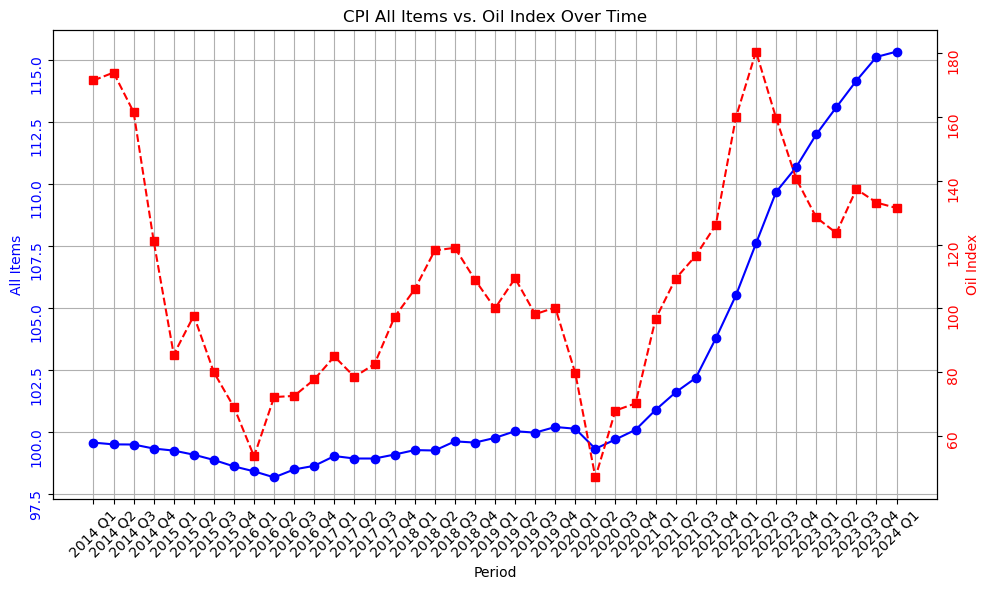

In [111]:
# Plotting a twin axis line plot to see the trend between the two
fig, ax1 = plt.subplots(figsize=(10, 6))

# All Items plot
ax1.plot(df_merged['Period'], df_merged['All Items'], marker='o', linestyle='-', color='b', label='All Items')
ax1.set_xlabel('Period')
ax1.set_ylabel('All Items', color='b')

# Index 2019 plot
ax2 = ax1.twinx()
ax2.plot(df_merged['Period'], df_merged['Oil_Index_2019'], marker='s', linestyle='--', color='r', label='Index 2019')
ax2.set_ylabel('Oil Index', color='r')

# Set x-axis labels for the Index 2019 plot only
ax1.set_xticks(df_merged['Period'])
ax1.set_xticklabels(df_merged['Period'], rotation=45)

# Adjust y-axis tick parameters for vertical labels
ax1.tick_params(axis='y', labelcolor='b', labelrotation=90)
ax2.tick_params(axis='y', labelcolor='r', labelrotation=90)

# Add grid lines
ax1.grid(True)

# Add labels and title
plt.title('CPI All Items vs. Oil Index Over Time')
plt.tight_layout()
plt.show()


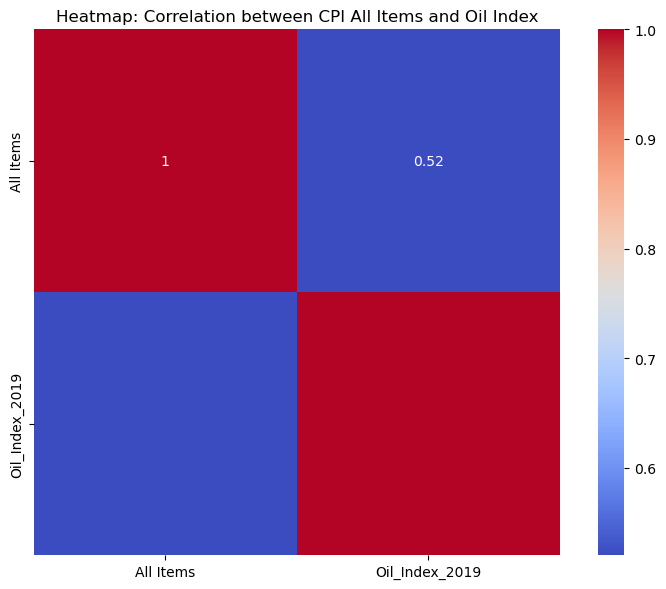

In [112]:
# Calculate correlation
corr = df_merged[['All Items', 'Oil_Index_2019']].corr()

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True, square=True)

# Add labels and title
plt.title('Heatmap: Correlation between CPI All Items and Oil Index')
plt.tight_layout()
plt.show()

A correlation coefficient of 0.52 indicates a moderate positive correlation between the two variables. In other words, as Brent Oil Price increases, the Inflation tends to increase as well, but the relationship is not very strong. However, we can still draw some conclusions from different periods (quarters of our analysis throughout the 10-year period)

## For next section, we will see the number of quarters when brent oil price was up, inflation was also up

In [116]:
# Calculate quarter-over-quarter percentage change
df_merged['Brent_Oil_Change'] = df_merged['Price'].pct_change() * 100
df_merged['CPI_Change'] = df_merged['All Items'].pct_change() * 100

# Identify quarters when Brent oil price is up
df_merged['Brent_Up'] = df_merged['Brent_Oil_Change'] > 0

# Identify quarters when CPI is up
df_merged['CPI_Up'] = df_merged['CPI_Change'] > 0

In [119]:
# Define a function to classify the relationship
def classify_relationship(row):
    if row['Brent_Up'] and row['CPI_Up']:
        return 'Both Up'
    elif not row['Brent_Up'] and not row['CPI_Up']:
        return 'Both Down'
    else:
        return 'Different'

In [120]:
# Apply the function to each row
df_merged['Relationship'] = df_merged.apply(classify_relationship, axis=1)

# Pivot the DataFrame to create a matrix
matrix = df_merged.pivot_table(index='CPI_Up', columns='Brent_Up', values='Relationship', aggfunc='count')

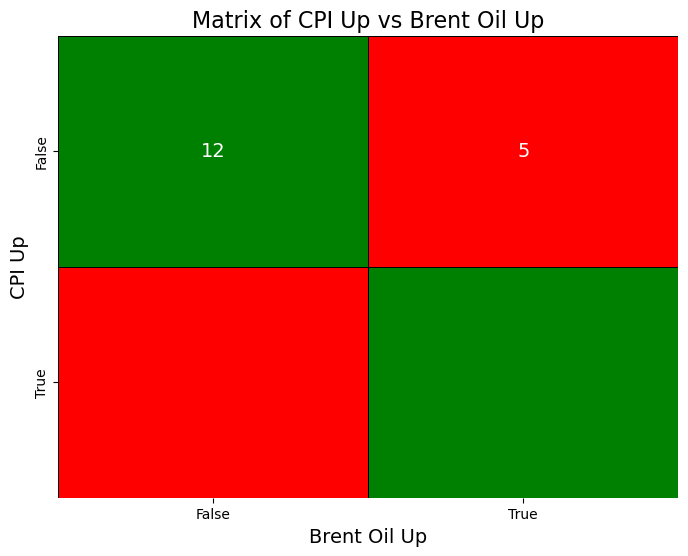

In [122]:
# Create a matrix for CPI Up vs Brent Oil Up
matrix = pd.crosstab(df_merged['CPI_Up'], df_merged['Brent_Up'])

# Define the colors for the heatmap
colors = ['red', 'green']

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, cmap=colors, cbar=False, fmt='g', annot_kws={"fontsize": 14}, linewidths=0.5, linecolor='black')

# Customize plot
plt.title('Matrix of CPI Up vs Brent Oil Up', fontsize=16)
plt.xlabel('Brent Oil Up', fontsize=14)
plt.ylabel('CPI Up', fontsize=14)

# Adjust the ticks to show the actual labels
plt.xticks([0.5, 1.5], ['False', 'True'])
plt.yticks([0.5, 1.5], ['False', 'True'])

plt.show()

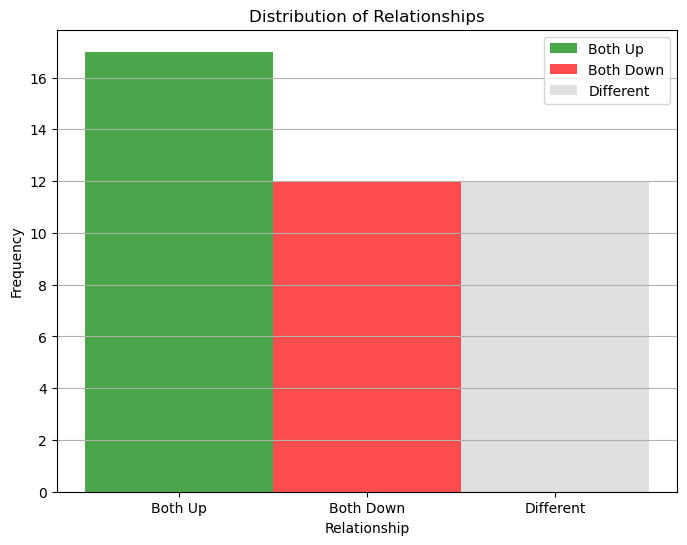

In [123]:
# Creating a histogram on the relationship

plt.figure(figsize=(8, 6))

# Plotting each category separately
plt.hist(df_merged[df_merged['Relationship'] == 'Both Up']['Relationship'], bins=1, color='green', alpha=0.7, label='Both Up', align='mid')
plt.hist(df_merged[df_merged['Relationship'] == 'Both Down']['Relationship'], bins=1, color='red', alpha=0.7, label='Both Down', align='mid')
plt.hist(df_merged[df_merged['Relationship'] == 'Different']['Relationship'], bins=1, color='lightgrey', alpha=0.7, label='Different', align='mid')

# Customize plot
plt.title('Distribution of Relationships')
plt.xlabel('Relationship')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.legend()

# Show plot

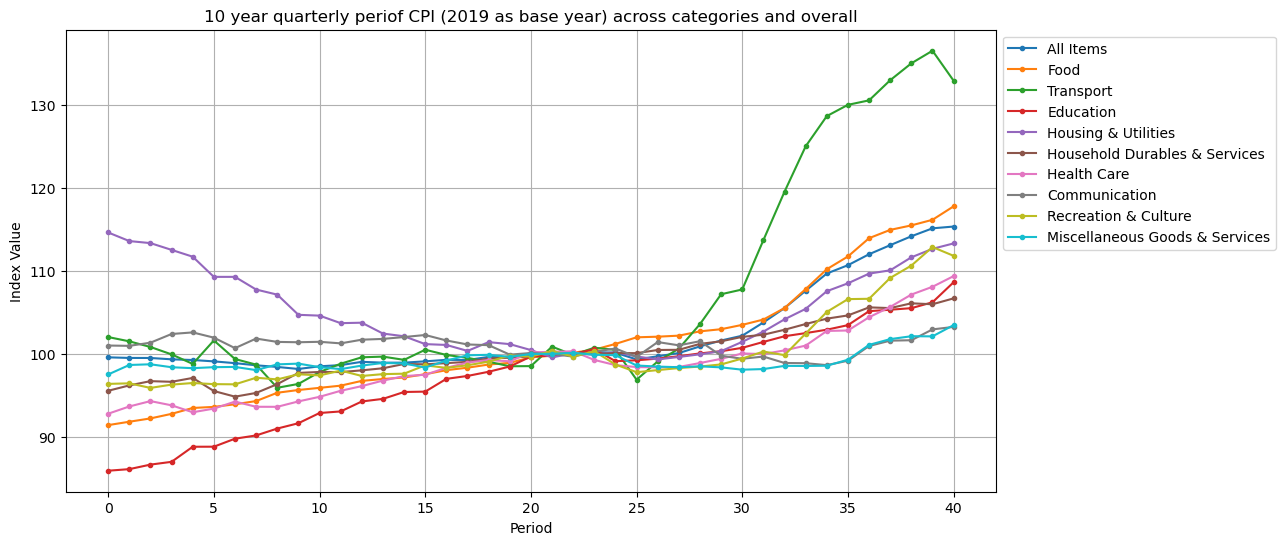

In [134]:
## Plotly express
# Find the index of the first non-zero value for each column
first_nonzero_index = df.apply(lambda x: np.argmax(x != 0))

# Plotting the time series for food service categories starting from the first non-zero index
plt.figure(figsize=(12, 6))

for column in ['All Items','Food','Transport', 
               'Education', 'Housing & Utilities',
               'Household Durables & Services',
               'Health Care', 'Communication',
               'Recreation & Culture',
               'Miscellaneous Goods & Services']:
    
    start_index = first_nonzero_index[column]
    plt.plot(df.index[start_index:], df[column].iloc[start_index:], marker='.', linestyle='-', label=column)

# Adding titles and labels
plt.title('10 year quarterly periof CPI (2019 as base year) across categories and overall')
plt.xlabel('Period')
plt.ylabel('Index Value')

# Adding legend with better layout
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Displaying the plot
plt.grid(True)
plt.show()

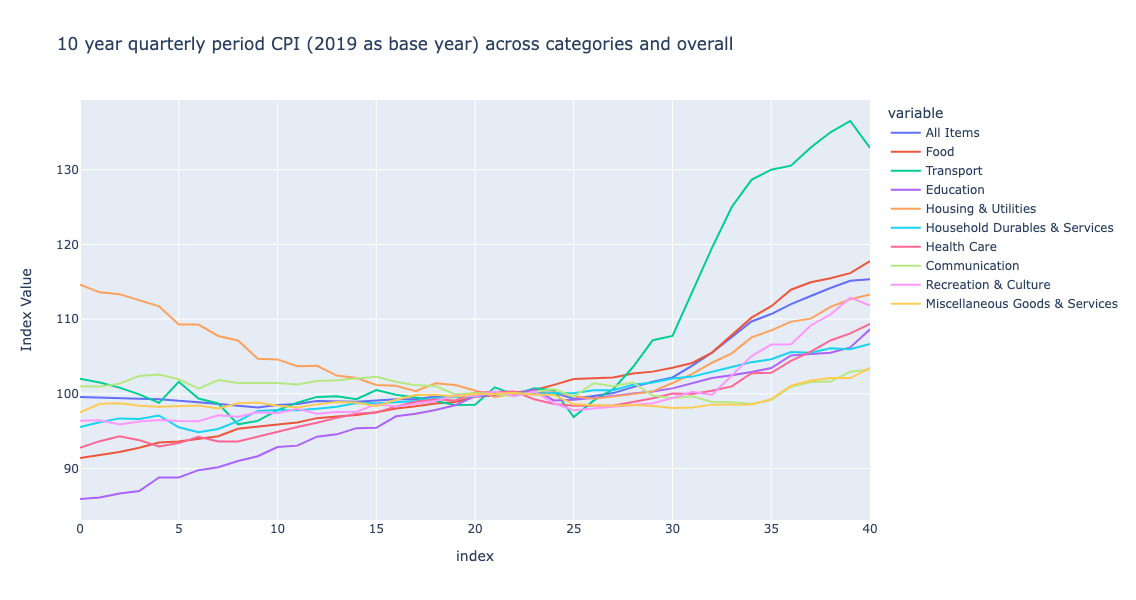

In [152]:
import plotly.express as px

# Filter the DataFrame to include only the columns of interest
columns_of_interest = ['All Items','Food','Transport', 
                       'Education', 'Housing & Utilities',
                       'Household Durables & Services',
                       'Health Care', 'Communication',
                       'Recreation & Culture',
                       'Miscellaneous Goods & Services']
df_filtered = df[columns_of_interest]

# Find the index of the first non-zero value for each column
first_nonzero_index = df_filtered.apply(lambda x: x.ne(0).idxmax())

# Plotting the time series for food service categories starting from the first non-zero index
fig = px.line(df_filtered, x=df.index, y=df_filtered.columns,
              title='10 year quarterly period CPI (2019 as base year) across categories and overall',
              labels={'value': 'Index Value'},
              width=1200, height=600)

# Show plot
fig.show()
